In [1]:
#Importing required libraries
import ndjson
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
#import patoolib
#import os
#Extracting the json.gz file 
#patoolib.extract_archive("Video_Games_5.json.gz",outdir="C:\\Users\\16692\\Documents")
#Already extracted the file so commenting above code

In [6]:
os.listdir("C:\\Users\\16692\\Documents")

['.ipynb_checkpoints',
 '221(G) Checklist.txt',
 '2FA Authentication.docx',
 '2FA Authentication.zip',
 '2_Heart+Disease+Prediction.ipynb',
 '3_Heart+Disease+Prediction.ipynb',
 '5015315_SravanaKalyani_Vundela_Mainframes_Jul2022.doc',
 'Accomplishments.docx',
 'Adaboost_cancer_prediction-.ipynb',
 'Advertising.csv',
 'airline passenger.ipynb',
 'airline-passenger-traffic.csv',
 'api_data_wrangling_mini_project.ipynb',
 'Assignment 1 pyspark.txt',
 'Assignment advanced Regression.ipynb',
 'Assignment answers.docx',
 'Assignment Clustering',
 'Assignment Clustering.zip',
 'Assignment subjective Answers.pdf',
 'Assignment subjective.docx',
 'Attrition+prediction+using+GBM+.ipynb',
 'AWS.docx',
 'BAD PO LINE and QTY DISC.xlsx',
 'Bank+Marketing+Campaign_EDA-blank+notebook (1).ipynb',
 'Bank+Marketing+Campaign_EDA-blank+notebook.ipynb',
 'Bankdata.csv',
 'Big Data',
 'Big data Chain.txt',
 'Big.csv',
 'bird pecker.jpg',
 'bitcoinfinal.csv',
 'Brats dataset',
 'Brats dataset.zip',
 'Brats da

In [7]:
# reading reviews from json file
with open("C:\\Users\\16692\\Documents\\Video_Games_5.json",encoding="utf8") as f:
    data = ndjson.load(f)

In [9]:
#Converting json file to DataFrame
ama_df = pd.DataFrame(data)
ama_df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN,NaN
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN,NaN


reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
asin - ID of the product, e.g. 0000013714
reviewerName - name of the reviewer
vote - helpful votes of the review
style - a disctionary of the product metadata, e.g., "Format" is "Hardcover"
reviewText - text of the review
overall - rating of the product
summary - summary of the review
unixReviewTime - time of the review (unix time)
reviewTime - time of the review (raw)
image - images that users post after they have received the product

In [10]:
#The Python shape method returns a tuple denoting the dimensions of a Python object on which it is applied. 
#These Python objects on which the shape method is applied is usually a numpy.array or a pandas.DataFrame.
#The number of elements in the tuple returned by the shape method is equal to the number of dimensions in the Python object.
ama_df.shape

(497577, 12)

In [11]:
#This Method prints the information or summary of the dataframe. It prints the various information of the Dataframe such as index type, dtype, columns, non-values, and memory usage.
#It gives a quick overview of the dataset
ama_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497577 entries, 0 to 497576
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         497577 non-null  float64
 1   verified        497577 non-null  bool   
 2   reviewTime      497577 non-null  object 
 3   reviewerID      497577 non-null  object 
 4   asin            497577 non-null  object 
 5   reviewerName    497501 non-null  object 
 6   reviewText      497419 non-null  object 
 7   summary         497468 non-null  object 
 8   unixReviewTime  497577 non-null  int64  
 9   vote            107793 non-null  object 
 10  style           289237 non-null  object 
 11  image           3634 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 42.2+ MB


<AxesSubplot:xlabel='overall', ylabel='count'>

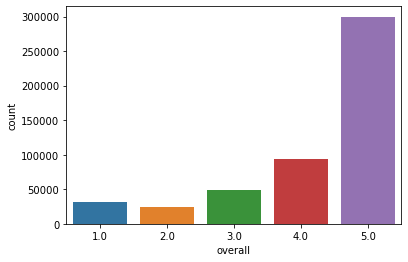

In [12]:
#When you use sns.countplot, Seaborn literally counts the number of observations per category for a categorical variable, and displays the results as a bar chart. 
#Essentially, the Seaborn countplot () is a way to create a type of bar chart in Python.

sns.countplot(data = ama_df, x='overall')

In [13]:
#The value_counts () function is used to get a Series containing counts of unique values. The resulting object will be in descending order so that the first element is the most frequently-occurring element.
#Excludes NA values by default dropna = False means the original dataframe will not be changed

len(ama_df['asin'].value_counts(dropna=False))

17408

In [14]:
#creating small dataframes w.r.t to the ratings
Rone_1500 = ama_df[ama_df['overall']==1.0].sample(n=1500)
Rtwo_500 = ama_df[ama_df['overall']==2.0].sample(n=500)
Rthree_500 = ama_df[ama_df['overall']==3.0].sample(n=500)
Rfour_500 = ama_df[ama_df['overall']==4.0].sample(n=500)
Rfive_1500 = ama_df[ama_df['overall']==5.0].sample(n=1500)

In [15]:
#Concatenating the ratings for above reviews
UR = pd.concat([Rone_1500, Rtwo_500, Rthree_500, Rfour_500, Rfive_1500], axis=0)

In [16]:
#Checking number of observations per category w.r.t to rating 
UR['overall'].value_counts(dropna=False)

5.0    1500
1.0    1500
4.0     500
3.0     500
2.0     500
Name: overall, dtype: int64

<AxesSubplot:xlabel='overall', ylabel='count'>

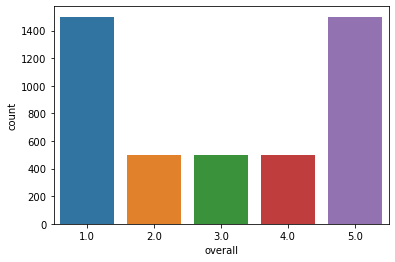

In [17]:
#Plotting a countplot for this  data 
sns.countplot(data=UR, x='overall')

In [18]:
#Random sampling of the reviews 
hundredk_reviews = ama_df.sample(n=100000, random_state=42)
hundredk_reviews

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
364850,5.0,True,"12 17, 2015",A2DABQ8D1XJT05,B00KWEH61U,Maryann,Love this 3ds game. I made a zombie Togepi wit...,Love this 3ds game,1450310400,NaN,NaN,NaN
216628,5.0,True,"12 28, 2014",ANALWGWPY8HEA,B003S2JI82,John,Fun game,fun game,1419724800,NaN,{'Platform:': ' Nintendo Wii'},NaN
319038,5.0,True,"09 2, 2013",AZC9D5RVK7GR6,B00DTWES6I,Tye D. Reed,This game is so fun. I think it is the best S...,Wow sooooo awsome,1378080000,NaN,"{'Edition:': ' Deluxe', 'Platform:': ' PC Down...",NaN
440696,5.0,False,"01 15, 2018",A9SIXGGYKDBD,B01GKF7T9S,Jaguar 10,I hated the first game but absolutely love thi...,Don't let Watchdogs 1 Deter You - this game is...,1515974400,NaN,"{'Edition:': ' Standard', 'Platform:': ' PlayS...",NaN
287513,5.0,True,"04 9, 2015",A1WDH8O30ZC16S,B00B67ZTUW,Atomic Kitty,Love the Tales games. Glad I purchased this one.,"Great game, interactive for two players as well.",1428537600,NaN,{'Color:': ' Playstation 3'},NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
25721,4.0,True,"01 28, 2015",A1J1F06GHQY2F7,B00005NECC,Michael Curtiss,This is a good game though my son was too youn...,GOOD GAME,1422403200,NaN,"{'Edition:': ' Standard', 'Platform:': ' Game ...",NaN
250120,5.0,True,"09 7, 2011",A33GG85KTMLDSW,B0053OLY9O,OJ Silk,I am very pleased with this headset. The sound...,Kudos to Sony -- excellent headset for PS3 & PC,1315353600,4,NaN,NaN
394578,5.0,True,"01 23, 2017",A2S9KXJ24VRD5S,B00VHWMK44,Vince,kids love them,worth the pice,1485129600,NaN,"{'Color:': ' Splatoon 3-pack', 'Edition:': ' U...",NaN
472515,5.0,True,"06 11, 2013",A1Q671HPKJ50KD,B0018C1MF6,MAJIORLEAGUE,I read some of the reviews on this bag and the...,BETTER THAN I EXPECTED!,1370908800,NaN,NaN,NaN


In [19]:
#Writing random and 100k records into csv file
UR.to_csv(r"C:\Users\16692\Documents\small.csv", index=False)
hundredk_reviews.to_csv(r"C:\Users\16692\Documents\big.csv", index=False)

In [20]:
#Creating sentiment analyzer
import pandas as pd
import nltk
from IPython.display import display
pd.set_option('display.max_columns', None)

In [21]:
#Loading csv file 
reviews = pd.read_csv(r"C:\Users\16692\Documents\small.csv")
reviews.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,1.0,False,"10 3, 2013",A10RFAF1CGFKHZ,B000CN750I,J.C.,...you're relying on it's preloaded cheat code...,DO NOT buy this disk - A waste of money unless...,1380758400,2.0,NaN,NaN
1,1.0,True,"01 22, 2011",A3RUOVKA1S5NYX,B00005MAMO,ksnod,"They said it was in Good condition, thats what...",Peice of Crap,1295654400,NaN,NaN,NaN
2,1.0,False,"11 26, 2010",A2UWYXQMVSPP0Z,B0012N746W,majorlynch,When I buy a game I want to be able to buy the...,NO DLC FOR PS3!!!,1290729600,5.0,{'Format:': ' Video Game'},NaN
3,1.0,True,"03 23, 2011",A2KZ5ABOP3EORT,B002BS47YE,Brent A. Feinberg,I was really looking forward to this game show...,Horrible port of an XBOX 360 game,1300838400,21.0,{'Format:': ' Video Game'},NaN
4,1.0,False,"11 15, 2016",A2IFUYQJJE09D,B01GKF824Y,TimetoRise,Terribly boring and quite honestly not very fu...,Boring and Repetitive,1479168000,5.0,"{'Edition:': ' Standard', 'Platform:': ' Xbox ...",NaN


In [22]:
reviews.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,1.0,False,"10 3, 2013",A10RFAF1CGFKHZ,B000CN750I,J.C.,...you're relying on it's preloaded cheat code...,DO NOT buy this disk - A waste of money unless...,1380758400,2.0,NaN,NaN
1,1.0,True,"01 22, 2011",A3RUOVKA1S5NYX,B00005MAMO,ksnod,"They said it was in Good condition, thats what...",Peice of Crap,1295654400,NaN,NaN,NaN
2,1.0,False,"11 26, 2010",A2UWYXQMVSPP0Z,B0012N746W,majorlynch,When I buy a game I want to be able to buy the...,NO DLC FOR PS3!!!,1290729600,5.0,{'Format:': ' Video Game'},NaN
3,1.0,True,"03 23, 2011",A2KZ5ABOP3EORT,B002BS47YE,Brent A. Feinberg,I was really looking forward to this game show...,Horrible port of an XBOX 360 game,1300838400,21.0,{'Format:': ' Video Game'},NaN
4,1.0,False,"11 15, 2016",A2IFUYQJJE09D,B01GKF824Y,TimetoRise,Terribly boring and quite honestly not very fu...,Boring and Repetitive,1479168000,5.0,"{'Edition:': ' Standard', 'Platform:': ' Xbox ...",NaN


In [23]:
#TreeBankWord Tokenizer
from nltk.tokenize import TreebankWordTokenizer
from string import punctuation
import string
tb_tokenizer = TreebankWordTokenizer()

In [24]:
reviews["rev_text_low"] = reviews['reviewText'].apply(lambda rev: str(rev)\
                                                        .translate(str.maketrans('', '', punctuation))\
                                                        .replace("<br />", " ")\
                                                        .lower())

In [25]:
reviews[['reviewText','rev_text_low']].sample(2)

,reviewText,rev_text_low
928,We downloaded and played this game after playi...,we downloaded and played this game after playi...
736,The D-Pads on these SUCK! They are completely ...,the dpads on these suck they are completely di...


In [27]:
reviews["tb_tokens"] = reviews['rev_text_low'].apply(lambda rev: tb_tokenizer.tokenize(str(rev)))

In [28]:
pd.set_option('display.max_colwidth', None)

In [29]:
reviews[['reviewText','tb_tokens']].sample(3)

,reviewText,tb_tokens
1341,"Fanboy reviews aside, there is something seriously wrong with this game. Take this as a heads up, there have literally been 4 separate missions that glitch out and are incapable of completing due to npc's not reacting, my character sinking into the floor, and a quest giver not appearing, requiring you to restart your console. They claim there is a patch, but if you don't have a live account to download that day 1 patch, you can expect clipping issues, glitchy characters and objects separating into mid-air, broken mission objectives, and sync problems. It astounds me to no end that publishers think they can push this crap out with the expectation that they can simply fix it later.\n\nIn terms of the game, here are some facts, judge them as you will:\n\n- Some of the features that have been marketed are misleading- you can't actually ""free run"" through buildings. You look for an open window and he just goes through an animation and you're out the other side, losing pursuers. It is pretty much a fancy, slightly faster version of the hideouts from previous games\n\n-There are a LOT of cutscenes. Probably around a 1:1 minute per minute ratio in the first few hours. Expect a lot of talking, an order to ride a horse somewhere, more talking, go run over here, more talking, kill a deer, more talking, go run over there, kill that guy, repeat.\n\n- Combat is just about blow-for-blow arkham city's combat system. Two buttons do just about everything, so the entertainment comes from watching him do the moves. Combat is still set up so that everyone circles up around you and take turns getting murdered.\n\n- Naval warfare takes up a fair chunk of the game. In my opinion, it's totally awesome and probably the best part of the game (when your ship isn't literally sailing through the port, glitching out of the map)I checked the clock the moment I finally unlocked it. The first time I stepped foot on a ship that I controlled was 8 hours and 24 minutes into the game.\n\n-You don't play as a full assassin(white robes and gear) like the previous games until 6-7 hours into the game.\n\nI haven't tried multiplayer yet, our internet connection is still out from the storm. If you can't get the patch yet, don't play this game, a better version will probably be out in like a month(and a good black friday deal or something)","[fanboy, reviews, aside, there, is, something, seriously, wrong, with, this, game, take, this, as, a, heads, up, there, have, literally, been, 4, separate, missions, that, glitch, out, and, are, incapable, of, completing, due, to, npcs, not, reacting, my, character, sinking, into, the, floor, and, a, quest, giver, not, appearing, requiring, you, to, restart, your, console, they, claim, there, is, a, patch, but, if, you, dont, have, a, live, account, to, download, that, day, 1, patch, you, can, expect, clipping, issues, glitchy, characters, and, objects, separating, into, midair, broken, mission, objectives, and, sync, problems, it, astounds, me, to, no, end, that, ...]"
3788,"Rock the 80's. What else is there to say? 80's was the best time of ALOT of lives, including mine so it makes this game even MORE fun for me!","[rock, the, 80s, what, else, is, there, to, say, 80s, was, the, best, time, of, alot, of, lives, including, mine, so, it, makes, this, game, even, more, fun, for, me]"
1161,"Same **** different year,\n\nGame is a copy/paste of BO3. They also made Cod4 ""feel"" differently than it used to. Not a big fan of how the remaster turned out.","[same, different, year, game, is, a, copypaste, of, bo3, they, also, made, cod4, feel, differently, than, it, used, to, not, a, big, fan, of, how, the, remaster, turned, out]"


In [30]:
#Casual Tokenizer
from nltk.tokenize.casual import casual_tokenize
reviews['casual_tokens'] = reviews['rev_text_low'].apply(lambda rev: casual_tokenize(str(rev)))
reviews[['reviewText','casual_tokens','tb_tokens']].sample(3)

,reviewText,casual_tokens,tb_tokens
595,"I can't say much that isn't already said on other reviews. In short, I wasted my money on this one. I loved the first one. This one is going on Ebay. And I just bought it yesterday.","[i, cant, say, much, that, isnt, already, said, on, other, reviews, in, short, i, wasted, my, money, on, this, one, i, loved, the, first, one, this, one, is, going, on, ebay, and, i, just, bought, it, yesterday]","[i, cant, say, much, that, isnt, already, said, on, other, reviews, in, short, i, wasted, my, money, on, this, one, i, loved, the, first, one, this, one, is, going, on, ebay, and, i, just, bought, it, yesterday]"
3292,Great Game,"[great, game]","[great, game]"
3629,nice game.,"[nice, game]","[nice, game]"


In [33]:
#Stemming
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
reviews['tokens_stemmed'] = reviews['tb_tokens'].apply(lambda words: [stemmer.stem(w) for w in words])
reviews[['tb_tokens','tokens_stemmed']].sample(3)

,tb_tokens,tokens_stemmed
2009,"[loved, the, concept, of, it, the, hacking, and, such, however, the, missions, did, get, a, bit, repetitive, by, the, end, all, i, could, think, was, not, this, again, graphics, were, fine, not, great, game, play, was, pretty, good, again, a, bit, repetitive, cars, handled, likewellnot, cars, character, interactions, could, have, been, much, more, robust, i, finished, the, main, missions, but, it, doesnt, hold, my, interest, enough, to, do, all, the, side, missions, and, such, so, ill, never, bring, down, the, human, trafficking, ring, and, whatever, else, you, can, bring, down, hopefully, the, next, version, assuming, there, is, one, will, expand, ...]","[love, the, concept, of, it, the, hack, and, such, howev, the, mission, did, get, a, bit, repetit, by, the, end, all, i, could, think, wa, not, thi, again, graphic, were, fine, not, great, game, play, wa, pretti, good, again, a, bit, repetit, car, handl, likewellnot, car, charact, interact, could, have, been, much, more, robust, i, finish, the, main, mission, but, it, doesnt, hold, my, interest, enough, to, do, all, the, side, mission, and, such, so, ill, never, bring, down, the, human, traffick, ring, and, whatev, els, you, can, bring, down, hope, the, next, version, assum, there, is, one, will, expand, ...]"
3802,"[very, fun, and, a, great, game]","[veri, fun, and, a, great, game]"
505,"[infinity, ward, has, found, a, way, to, make, this, game, worse, than, advanced, warfare, the, only, good, thing, about, this, game, is, that, it, comes, with, mw, remastered, and, even, that, is, missing, modes, and, maps, i, guess, activision, is, expecting, there, fanbase, to, rebuy, the, remastered, map, packs, waste, of, money]","[infin, ward, ha, found, a, way, to, make, thi, game, wors, than, advanc, warfar, the, onli, good, thing, about, thi, game, is, that, it, come, with, mw, remast, and, even, that, is, miss, mode, and, map, i, guess, activis, is, expect, there, fanbas, to, rebuy, the, remast, map, pack, wast, of, money]"


In [34]:
#Lemmatisation
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag

In [35]:
def penn_to_wn(tag):
    """
        Convert between the PennTreebank tags to simple Wordnet tags
    """
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

In [36]:
lemmatizer = WordNetLemmatizer()
def get_lemas(tokens):
    lemmas = []
    for token in tokens:
        pos = penn_to_wn(pos_tag([token])[0][1])
        if pos:
            lemma = lemmatizer.lemmatize(token, pos)
            if lemma:
                lemmas.append(lemma)
    return lemmas

In [37]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\16692\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\16692\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\16692\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [39]:
reviews['lemmas'] = reviews['tb_tokens'].apply(lambda tokens: get_lemas(tokens))

In [40]:
reviews[['reviewText','tokens_stemmed','lemmas']].sample(2)

,reviewText,tokens_stemmed,lemmas
1822,"Civ III is much anticipated and I would say quite disapointing. Civ II had a number of unballanced aspects (howitzers that won ever engagement and railroads that allowed instant transport to name a few). However, it was a good simulation of cultural development. Civ III lacks many of the key technological improvements of Civ II (no rail so you always use the same roads that you built in 3000 BC and no improvments in agriculture) that makes the game less fun. They should have made the game more ballanced but still kept the flow of history that made it great before.","[civ, iii, is, much, anticip, and, i, would, say, quit, disapoint, civ, ii, had, a, number, of, unballanc, aspect, howitz, that, won, ever, engag, and, railroad, that, allow, instant, transport, to, name, a, few, howev, it, wa, a, good, simul, of, cultur, develop, civ, iii, lack, mani, of, the, key, technolog, improv, of, civ, ii, no, rail, so, you, alway, use, the, same, road, that, you, built, in, 3000, bc, and, no, improv, in, agricultur, that, make, the, game, less, fun, they, should, have, made, the, game, more, ballanc, but, still, kept, the, flow, of, histori, that, made, it, great, ...]","[civ, iii, be, much, anticipate, i, say, quite, disapointing, civ, ii, have, number, unballanced, aspect, howitzer, won, ever, engagement, railroad, allow, instant, transport, name, few, however, be, good, simulation, cultural, development, civ, iii, lack, many, key, technological, improvement, civ, ii, rail, so, always, use, same, road, built, bc, improvments, agriculture, make, game, less, fun, have, make, game, more, ballanced, still, kept, flow, history, make, great]"
1548,"This game has virtually nothing going for it. In my frank opinion, this filler title would have bankrupted a smaller game developer. The guns are horribly nerfed (no suprise there). The first person animations are either jerky, or seem to be absent. Enemy AI is not bad, except that, yet again, fear is not a factor. There are multiple levels where ou have a flame thrower, and maybe I'm just odd, but if someone is charging at me with a flame thrower, my priorities will change. Speaking of enemies about 90% of them are OBVIOUSLY infinitly spawned. The levels are fraught with 10' hallways with unopenable doors that 100+ armed men pour out of.\n\nMy play style is DSM (dedicated squad marksmen), that means I snipe at 100-300M, and move up when clear. Unfortunatly, the enemies only stop spawning when your in the aforementioned hallway. Add to this that the 30-06 M1 Garand (2800-3000 ft lbs impact) takes atleast 3 rounds to kill, assuming you can hit anything. To be fair, when I sight in a weapon, I like the target to be on top of the iron sights, they put the target behind the front blade. Because of this I shoot alot of window sills.\n\nTo call your allies roadblocks would imply the stop the enemy too. They dont. They stop you from being able to move. I have on more than one occasion had to jump to a checkpoint because an ally decided to take cover next to me, thus trapping me in a corner. It seems the only function they serve is to occupy any available cover, thus throwing you under the bus, and to yell supid expressins. Further more, the only true objective to this game seems to be not getting pidgeon-holed. The grunts from Halo threw less grenades, and somehow a solder who is on enough drugs to shrug off a BAR ban land a grenade in a pie dish from 60 yards away. 10+ times per level, I will be prone behind a box/bench, bush, etc and a grenae will land so close I can throw it back without moving. Also, this same enemy AI can make a headsho, while running, through smoke and bushes from 50 Yds, but your allies can't hit a guy taking a casual stroll six feet from them.\n\nThe only moments in the game I truly enjoy are watching the AI Bonsai chargers beat the crap out of the immortal squad AIs. This can go on for up to a minut, and is very satisfying to see SGT. Roebuc

In [41]:
#Sentiment Analysis Model
def get_sentiment_score(tokens):
    score = 0
    tags = pos_tag(tokens)
    for word, tag in tags:
        wn_tag = penn_to_wn(tag)
        if not wn_tag:
            continue
        synsets = wn.synsets(word, pos=wn_tag)
        if not synsets:
            continue
        
        #most common set:
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        
        score += (swn_synset.pos_score() - swn_synset.neg_score())
        
    return score

In [42]:
nltk.download('sentiwordnet')

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\16692\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


True

In [43]:
## test
swn.senti_synset(wn.synsets("perfect", wn.ADJ)[0].name()).pos_score()

0.625

In [44]:
reviews['sentiment_score'] = reviews['lemmas'].apply(lambda tokens: get_sentiment_score(tokens))

In [99]:
reviews[['reviewText','lemmas','sentiment_score']].sample(5)

,reviewText,lemmas,sentiment_score
3334,Wicked game dawgs. To bad it aint split screen local multiplayer.,"[wicked, game, dawgs, bad, aint, split, screen, local, multiplayer]",-1.000
3149,I already have 100 hours of game play and strongly recommend this game to people who have interested in fps and exploring.,"[i, already, have, hour, game, play, strongly, recommend, game, people, have, interested, fps, explore]",1.375
4112,"Is Metroid the saga is awesome and the look is great... when you see it you're gonna think is HD... is awesome, buy it if you can, very fun game!! love it...!!","[be, metroid, saga, be, awesome, look, be, great, see, youre, gon, na, think, be, hd, be, awesome, buy, very, fun, game, love]",2.750
3464,Buen producto,"[buen, producto]",0.000
3475,"Definitely worth a replay. Graphic update look amazing! Still ran across a few bugs from last generation, but nothing I would consider a deal breaker.","[definitely, worth, replay, graphic, update, look, amaze, still, ran, few, bug, last, generation, nothing, i, consider, deal, breaker]",0.000


In [45]:
reviews[['reviewText','lemmas','sentiment_score']].sample(5)

,reviewText,lemmas,sentiment_score
4075,"Within minutes of beginning Half-Life 2, it dawned upon me that much like its predecessor, ""Half-Life,"" the game is truly revolutionary, not only for its astounding graphics engine but for its truly cinematic scope.\n\nThe plot is engaging and immensely beguiling. In Half-Life 1, the theoretical physicist Gordon Freeman, under the orders of his superiors, activated an interdimensional rift at the Black Mesa research facility situated in the desert. From the depths of the rift entered a race of aliens known as the Nihilant, which proceeded to lay waste to the facility and threaten humanity. Freeman entered through the rift and succeeded in destroying the homeworld from which the aliens originated. However, upon arrival at the Black Mesa Research Facility, the military engaged in a vicious cover-up involving the extermination of all survivors. In Half-Life 2, Gordon Freeman, having returned to Earth from the homeworld of the Nihilant, discovers City 17, an Orwellian nightmare in which the citizens have been completely subjugated by an authoritarian regime known as the Combine. Exacerbating the problem, the aliens released from Black Mesa now run amok in City 17. Fans of the original Half-Life will be pleased to learn that the characters Barry Calhoun and Dr Kleiner return from the original game and are leaders of a small band of resistance against the dictatorial regime.\n\nHighly detailed and with the most impressive physics engine I have ever seen in a game, Valve has created an environment in which gravity plays a pivotal and incredibly important role. Examples of this include stacking boxes to climb over a fence or through a window or floating barrels to raise a platform. The vast cityscapes and highly detailed facial features of the main characters are of a level never seen before. Unlike any other game presently, the features of the characters are truly lifelike, with visible wrinkles, expressions and pores. Other than the mesmeric and plentiful eye candy, the captivating plot engages successfully with the gamer, and I found the experience exceedingly satisfying. The musical score is excellent and seamlessly changes from that befitting a brooding atmosphere to a sequence of first person shooter action. It augments the gameplay well, though there are times where the score could use more variation.\n\nIt is, however, in the area of gameplay that Half-Life 2 truly excels. While Gordon Freeman is never seen and never speaks, this hardly detracts from the experience. Effortlessly shifting from moments of intense suspense and tension to mind-blowing action, as a first person shooter, Half-Life 2 is excellent. Here I must return to the game's amazing (I'm running out of superlatives here) physics engine. Freeman can pick up objects and shift them around, but it is the gravity gun that makes this area of the game truly unique. Using the gravity gun (in the game this is also known as the Zero Point Energy Field Manipulator), Gordon Freeman can pick up objects and, with a single click, send them flinging away. Apart from being a handy tool in solving the game's many gravity-based puzzles, the practice of hurling barrels at unsuspecting zombies is quite gratifying!\n\nMy only gripe with Half-Life 2 is the annoying system by which one must connect to the internet and ""log in"" with Steam for the game to run. Apart from being intensely frustrating when notified that the servers are too busy to run the game, such an unwieldy system really eliminates those without an internet connection, and taints what would otherwise be an unbelievable addition to the Half-Life series.","[minute, begin, halflife, dawn, much, predecessor, halflife, game, be, truly, revolutionary, not, only, astound, graphic, engine, truly, cinematic, scope, plot, be, engage, immensely, beguiling, halflife, theoretical, physicist, gordon, freeman, order, superior, activate, interdimensional, rift, black, mesa, research, facilit

In [51]:
from nltk import sent_tokenize, pos_tag
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.sentiment.util import mark_negation
from string import punctuation
from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [52]:
def get_sentiment_score1(text):
    
    """
        This method returns the sentiment score of a given text using SentiWordNet sentiment scores.
        input: text
        output: numeric (double) score, >0 means positive sentiment and <0 means negative sentiment.
    """    
    total_score = 0
    #print(text)
    raw_sentences = sent_tokenize(text)
    #print(raw_sentences)
    
    for sentence in raw_sentences:

        sent_score = 0     
        sentence = str(sentence)
        #print(sentence)
        sentence = sentence.replace("<br />"," ").translate(str.maketrans('','',punctuation)).lower()
        tokens = TreebankWordTokenizer().tokenize(text)
        tags = pos_tag(tokens)
        for word, tag in tags:
            wn_tag = penn_to_wn(tag)
            if not wn_tag:
                continue
            lemma = WordNetLemmatizer().lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            synsets = wn.synsets(lemma, pos=wn_tag)
            if not synsets:
                continue
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sent_score += swn_synset.pos_score() - swn_synset.neg_score()

        total_score = total_score + (sent_score / len(tokens))

    
    return (total_score / len(raw_sentences)) * 100

In [53]:
reviews1 = pd.read_csv(r"C:\Users\16692\Documents\small.csv",encoding="utf8")

In [54]:
reviews1.info

<bound method DataFrame.info of       overall  verified   reviewTime      reviewerID        asin  \
0         1.0     False   10 3, 2013  A10RFAF1CGFKHZ  B000CN750I   
1         1.0      True  01 22, 2011  A3RUOVKA1S5NYX  B00005MAMO   
2         1.0     False  11 26, 2010  A2UWYXQMVSPP0Z  B0012N746W   
3         1.0      True  03 23, 2011  A2KZ5ABOP3EORT  B002BS47YE   
4         1.0     False  11 15, 2016   A2IFUYQJJE09D  B01GKF824Y   
...       ...       ...          ...             ...         ...   
4495      5.0      True  02 12, 2017  A2WO2CO45PBQDU  B00WTI3JPE   
4496      5.0     False  11 14, 2016  A3V7F58M4ZXHIF  B01EZAA2ZI   
4497      5.0      True  11 18, 2011   AMQT10YWC37U2  B002BSA3EM   
4498      5.0      True   06 5, 2016  A3GBXZ2FRXD2D9  B00CMQTUSS   
4499      5.0     False   10 9, 2008   AVX1L42T98R8P  B00029QQNY   

             reviewerName  \
0                    J.C.   
1                   ksnod   
2              majorlynch   
3       Brent A. Feinberg   
4     

In [55]:
reviews1.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,1.0,False,"10 3, 2013",A10RFAF1CGFKHZ,B000CN750I,J.C.,"...you're relying on it's preloaded cheat codes. Gameshark has since shut down any support for this software disk. There's a ton of games you won't find codes for or any updated codes for previous games. Gameshark also removed all updates for preuploaded cheat codes so you can transfer them to your PS2 via flash pen drive. Unless you're a wiz at programming your own codes via computer and know how to transfer them to the memory card on disk boot up, don't bother with this crap. Gameshark is no longer Gameshark at it's core. It's been bought out and management is completely lacking. They now provide different and cheaper products that have nothing to do with cheats or codes. Look to other devices instead.",DO NOT buy this disk - A waste of money unless....,1380758400,2.0,NaN,NaN
1,1.0,True,"01 22, 2011",A3RUOVKA1S5NYX,B00005MAMO,ksnod,"They said it was in Good condition, thats what i was hoping for until i put the card into my controller to save my game for 007 World is Not Enough and it said ""Controller Pak may be damaged or broken"" well it was! I am not happy at all about this product and will never buy from this person/company again!",Peice of Crap,1295654400,NaN,NaN,NaN
2,1.0,False,"11 26, 2010",A2UWYXQMVSPP0Z,B0012N746W,majorlynch,When I buy a game I want to be able to buy the FULL game. So if there is DLC for the game I want to be able to buy that too.\n\nSo Eidos decide DLC is available for the Xbox 360 ONLY. Which means the PS3 version is never the full product.\n\nSo now I have to buy it on the xbox 360 to get the full experience AFTER buying it already.\n\nOne star for a shocking business practice.,NO DLC FOR PS3!!!,1290729600,5.0,{'Format:': ' Video Game'},NaN
3,1.0,True,"03 23, 2011",A2KZ5ABOP3EORT,B002BS47YE,Brent A. Feinberg,"I was really looking forward to this game showing what my system was capable of. Unfortunately, the best this game can do is tax an XBOX 360 which is ancient 5 year old HW. The game plays like almost every other generic shooter out there in confined spaces. Honestly, there is no reason anymore to buy an advanced computer with a good graphics card. PC Gamers should avoid this game and look elsewhere. There are only 3 graphics options on the settings screen. The amount of motion blur is rediculous and is used to cover up the very low resolution textures.\n\nI wish I could send this turd back.",Horrible port of an XBOX 360 game,1300838400,21.0,{'Format:': ' Video Game'},NaN
4,1.0,False,"11 15, 2016",A2IFUYQJJE09D,B01GKF824Y,TimetoRise,Terribly boring and quite honestly not very fun. The game can entertain you for the first hour or so. Very repetitive and unfortunately BORING. The main character is a walking clich and the controls are clunky. The storyline is incredibly weak. I would pass on this or wait for a deep discount.,Boring and Repetitive,1479168000,5.0,"{'Edition:': ' Standard', 'Platform:': ' Xbox One'}",NaN


In [56]:
reviews1.dropna(subset=['reviewText'], inplace=True)

In [57]:
reviews1.shape

(4499, 12)

In [58]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\16692\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [63]:
reviews1['swn_score'] = reviews1['reviewText'].apply(lambda text : get_sentiment_score1(text))

In [76]:
reviews1[['reviewText','swn_score']].sample(2)

,reviewText,swn_score
946,"Does the concept of starring in a youtube video while wearing shiny, garish costumes and strange make-up, appeal to you? Congratulations,you are the target marketing segment for this product. However I think that even this group will be disappointed with simporting. Sim-porting is when you invite a ""friend"" you just met today on the internet (and there have some adult males on the official sims site working hard to befriend many teen girls, giving them gifts, and simporting with them) to come to your sim town and preform on your stage for you. However the new adult friend will not actually show up in your town until at lease 10 sim hours later. It is a boring 10 hour wait for both you and your sims. Also, just for fun, although prewarned that this would happen, the developers were not careful and CC (like a virus) was allowed to come along with the simporter, and infect your entire game, permanately. The town, a cheesy Californiaish/Bocarotonish nightmare, is tiny, and difficult to build in. Get another Expansion pack. This one is truly awful. One star.\n\n***I am not an author/developer. I do not know this author/developer. I have received nothing of value, and I have no expectation of receiving anything of value, for writing this review.",0.366109
1896,"Decent game. Would have enjoyed it more if I had played it before the Xillias. There was a lot of it that I really didn't like. The battle system was watered down, slow, neutered, tedious, unresponsive, the fusion with the Seraphs often made it more difficult to fight, and the artes seemed wholly ineffective. The rest of the gameplay was comparatively lacking as well. The master weapons were garbage, the weapon/armor creation system was more annoying than it was useful. The Lord of the Land system was horrendously slow to level up and was area specific so you'd have to level up the Lord in every area to get the benefits. The character level system was all predetermined, no control. The storyline was really basic which made it sort of anticlimactic. It wasn't an anticipated denuoment, it was an ""alright, let's get this over with."" The characters were all annoying which made the skits painful. It really just didn't do anything well and all the stuff I liked from previous games was absent.",2.748691


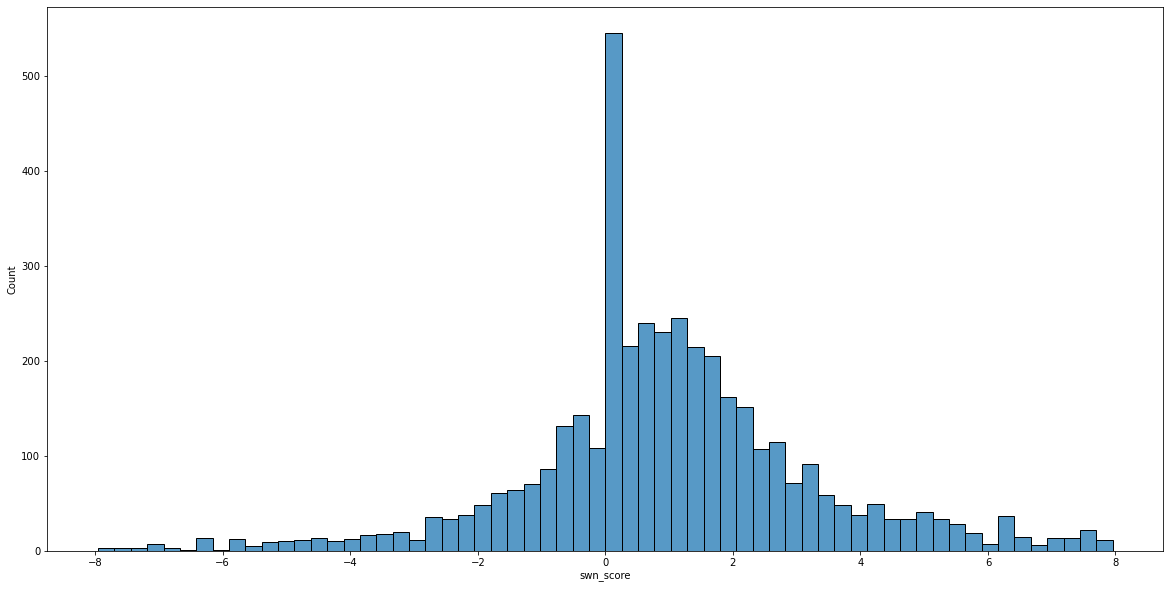

In [78]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
sns.histplot(x='swn_score', data=reviews1.query("swn_score < 8 and swn_score > -8"), ax=ax)
plt.show()

In [82]:
reviews1['swn_sentiment'] = reviews1['swn_score'].apply(lambda x: "positive" if x>1 else ("negative" if x<0.5 else "neutral"))

In [84]:
reviews1['swn_sentiment'].value_counts(dropna=False)

positive    2221
negative    1818
neutral      460
Name: swn_sentiment, dtype: int64

<AxesSubplot:xlabel='overall', ylabel='count'>

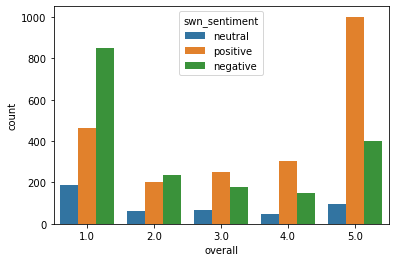

In [86]:
sns.countplot(x='overall', hue='swn_sentiment' ,data = reviews1)

<AxesSubplot:xlabel='swn_sentiment', ylabel='overall'>

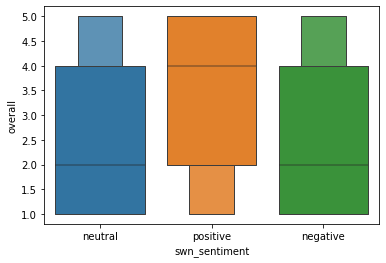

In [88]:
sns.boxenplot(x='swn_sentiment', y='overall', data = reviews1)

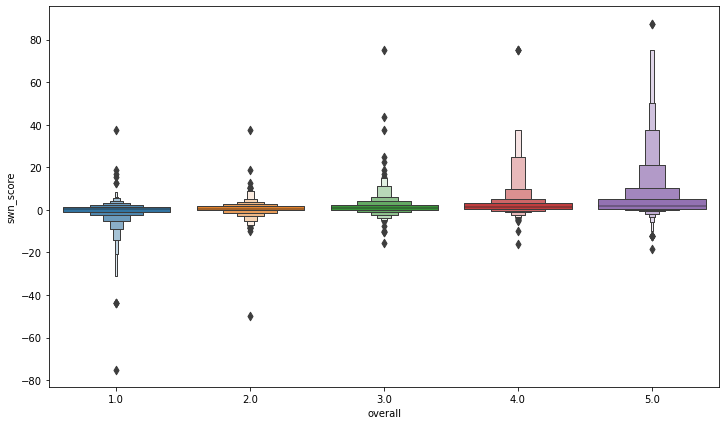

In [89]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12,7))
sns.boxenplot(x='overall', y='swn_score', data = reviews1, ax=ax)
plt.show()

In [90]:
reviews1['true_sentiment'] = \
    reviews1['overall'].apply(lambda x: "positive" if x>=4 else ("neutral" if x==3 else "negative"))

In [92]:
y_swn_pred, y_true = reviews1['swn_sentiment'].tolist(), reviews1['true_sentiment'].tolist()

In [93]:
len(y_swn_pred), len(y_true)

(4499, 4499)

In [94]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_swn_pred)

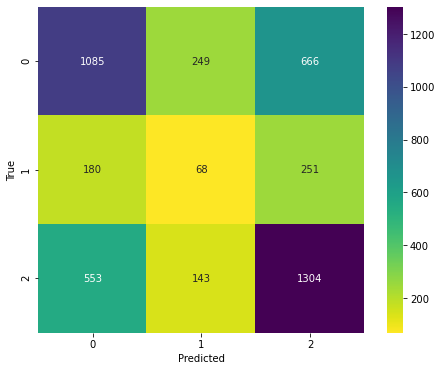

In [95]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
sns.heatmap(cm, cmap='viridis_r', annot=True, fmt='d', square=True, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True');

In [96]:
#Assessing the performance
tp, tn, fp, fn = 1088, 70+242+142+1310, 265+647, 188+547

In [97]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

In [99]:
print("recall: {}\nprecision: {}\nf1 score: {}".format(recall, precision, f1))

recall: 0.5968184311574328
precision: 0.544
f1 score: 0.5691865027465342


In [100]:
#Positive sentiment prediction
tp, tn, fp, fn = 1310, 1088+265+70+188, 242+647, 142+547

In [101]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

In [102]:
print("recall: {}\nprecision: {}\nf1 score: {}".format(recall, precision, f1))

recall: 0.655327663831916
precision: 0.5957253296953161
f1 score: 0.6241067174845164


In [103]:
#Uisng NLTK opinion Lexicon
import nltk
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize, sent_tokenize

In [106]:
nltk.download("opinion_lexicon")

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\16692\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\opinion_lexicon.zip.


True

In [107]:
pos_comm = list(opinion_lexicon.positive())
neg_comm = list(opinion_lexicon.negative())

In [114]:
def get_sentiment_score_oplex(text):
    
    """
        This method returns the sentiment score of a given text using nltk opinion lexicon.
        input: text
        output: numeric (double) score, >0 means positive sentiment and <0 means negative sentiment.
    """    
    total_score = 0

    raw_sentences = sent_tokenize(text)
    
    for sentence in raw_sentences:

        sent_score = 0     
        sentence = str(sentence)
        sentence = sentence.replace("<br />"," ").translate(str.maketrans('','',punctuation)).lower()
        tokens = TreebankWordTokenizer().tokenize(text)
        for token in tokens:
            sent_score = sent_score + 1 if token in pos_comm else (sent_score - 1 if token in neg_comm else sent_score)
        total_score = total_score + (sent_score / len(tokens))

    
    return total_score

In [115]:
reviews1['oplex_sentiment_score'] = reviews1['reviewText'].apply(lambda x: get_sentiment_score_oplex(x))

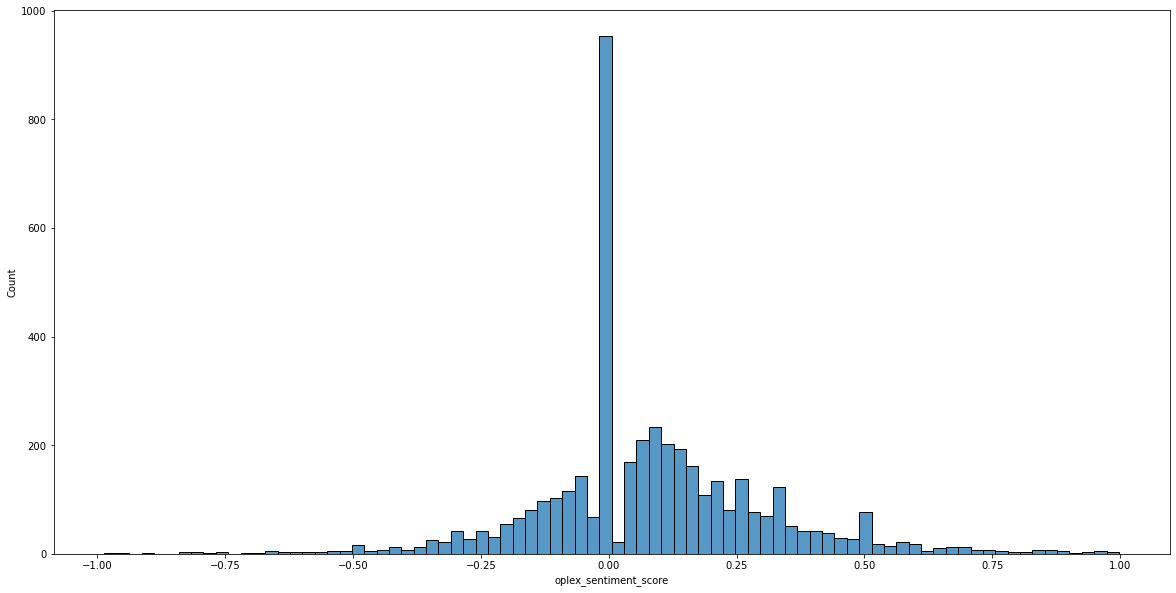

In [117]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
sns.histplot(x='oplex_sentiment_score',\
             data=reviews1.query("oplex_sentiment_score < 1 and oplex_sentiment_score>-1"), ax=ax)
plt.show()

In [118]:
reviews1['oplex_sentiment'] = \
    reviews1['oplex_sentiment_score'].apply(lambda x: "positive" if x>0.1 else ("negative" if x<0 else "neutral"))

In [119]:
reviews1['oplex_sentiment'].value_counts(dropna=False)

positive    1872
neutral     1571
negative    1056
Name: oplex_sentiment, dtype: int64

<AxesSubplot:xlabel='overall', ylabel='count'>

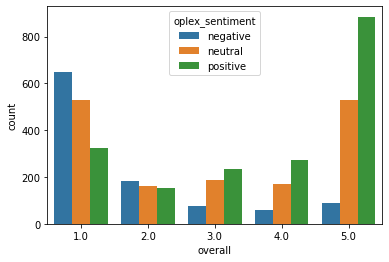

In [120]:
sns.countplot(x='overall', hue='oplex_sentiment' ,data = reviews1)

<AxesSubplot:xlabel='oplex_sentiment', ylabel='overall'>

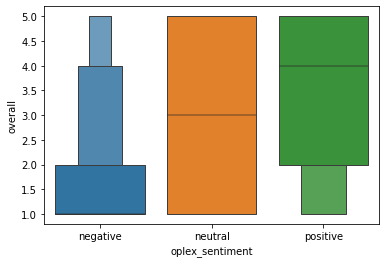

In [121]:
sns.boxenplot(x='oplex_sentiment', y='overall', data = reviews1)

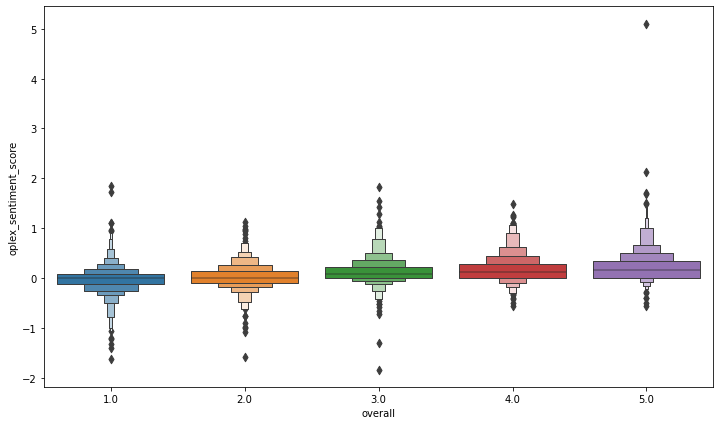

In [123]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12,7))
sns.boxenplot(x='overall', y='oplex_sentiment_score', data = reviews1, ax=ax)
plt.show()

In [125]:
y_oplex_pred = reviews1['oplex_sentiment'].tolist()

In [126]:
oplex_cm = confusion_matrix(y_true, y_oplex_pred)

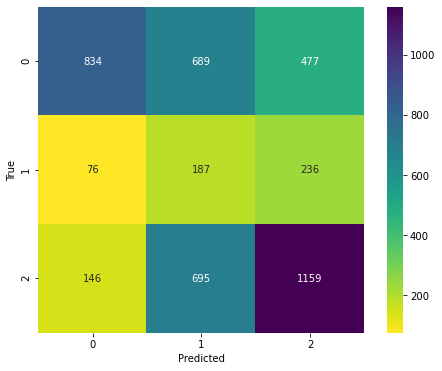

In [127]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
sns.heatmap(oplex_cm, cmap='viridis_r', annot=True, fmt='d', square=True, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True');

In [128]:
oplex_cm = list(oplex_cm.ravel())

In [129]:
oplex_cm

[834, 689, 477, 76, 187, 236, 146, 695, 1159]

In [130]:
#Negative Label Assesment
tp, tn, fp, fn = 804, 195+199+686+1181, 106+132, 701+495

In [131]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

print("recall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))

recall: 0.402
precission: 0.7715930902111324
f1 score: 0.5285996055226825


In [132]:
#Positive label Assesment
tp, tn, fp, fn = 1181, 804+701+106+195, 495+199, 132+686

In [133]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

print("recall: {}\nprecision: {}\nf1 score: {}".format(recall, precision, f1))

recall: 0.5907953976988495
precision: 0.6298666666666667
f1 score: 0.6097057305110997
